In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [2]:
df=pd.read_excel("maliciousornot.xlsx")

In [3]:
df.head(20)

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,0.101956,1418.390000,1.172665,11125.618000,198.704133,0.008289,0.063523,0.069598,0.020557,0.038899,0.008022,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,0.073407,0.704014,0.950645,4401.542667,95.958293,0.006768,0.016943,0.024093,0.017357,0.017992,0.004575,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,0.077707,0.965801,1.019298,5939.103333,121.800193,0.007966,0.051891,0.049637,0.026658,0.029145,0.005921,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,0.126217,0.641967,1497.405333,4462.423333,35.271927,0.011800,0.096606,0.073329,0.024184,0.077241,0.011927,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,0.076204,0.980826,1.012044,7044.022667,122.331280,0.014883,0.031878,0.073679,0.024417,0.022746,0.006626,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
5,1,16.126900,20.336733,106.955673,618.003533,0.165544,0.220207,0.204404,0.104780,0.270336,0.098614,0.433289,1.153106,2871.754000,35.220113,0.009728,0.043329,0.047565,0.014728,0.028044,0.006583,20.038807,30.764167,133.937467,960.619200,0.231994,0.679920,0.693651,0.225518,0.516190,0.161139
6,1,23.639833,25.880760,154.921867,1347.146667,0.122577,141.191333,0.145984,95.854667,0.232383,0.074378,0.578625,1.001552,4.119160,69.831420,0.005588,0.017902,0.029197,0.013459,0.017733,0.002823,29.637227,35.828920,198.445067,2080.305333,0.186787,0.333678,0.490154,0.250258,0.396761,0.108393
7,1,17.759020,26.981793,116.839067,748.573133,0.154015,0.213082,0.121321,0.077526,0.284455,0.096515,0.755827,1783.674000,4994.805333,66.010187,0.011405,0.039236,0.032228,0.018756,0.019249,0.007010,22.098387,36.450680,143.263867,1161.914000,0.214248,0.476942,0.346890,0.201554,0.413989,0.149093
8,1,16.839333,28.264173,113.341667,673.314267,0.164896,0.250258,0.240802,0.121153,304.403333,0.095712,0.396761,1297.924000,3116.572000,31.502507,0.007424,0.045363,0.046023,0.015881,0.027759,0.004856,20.064713,39.805593,137.564400,957.639933,0.220595,0.699610,698.184667,266.838667,0.567097,0.138860
9,1,16.139853,31.139813,108.769140,616.449133,0.153627,0.310362,0.294429,0.110660,262.952667,0.106774,0.385491,2071.238000,2641.184667,31.010280,0.009260,0.093484,0.100298,0.018549,0.023174,0.013057,19.546580,52.694160,126.489300,921.500133,0.240025,1370.462667,1431.343333,286.268667,0.565543,0.268782


In [4]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SOURCE_A,SOURCE_B,SOURCE_C,SOURCE_D,SOURCE_F,SOURCE_E,SOURCE_G,SOURCE_H,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,1.141613,102.672734,1054.061525,3333.335724,424.041644,0.009134,0.235648,1.549989,0.090850,0.309790,0.019027,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,9.374137,365.368355,1057.620796,2298.396221,2021.142069,0.003906,2.215631,23.059178,1.035261,2.788495,0.331812,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,0.064715,0.144430,0.466579,0.999220,13.056960,0.003455,0.002917,0.000000,0.000000,0.010210,0.001159,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,0.074737,0.304533,1.108708,1927.132167,24.015480,0.006637,0.016901,0.019352,0.010198,0.019436,0.002907,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,0.079767,0.444688,1325.126000,2827.712667,34.255090,0.008242,0.026800,0.033860,0.014313,0.024275,0.004155,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,0.086013,0.764862,1814.114333,4181.336000,66.709667,0.010620,0.042212,0.055091,0.019213,0.030505,0.005840,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,101.036000,3721.492667,5046.618667,12703.334000,12737.012667,0.040324,34.974000,512.952000,15.544000,40.155333,7.772000,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [5]:
df.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

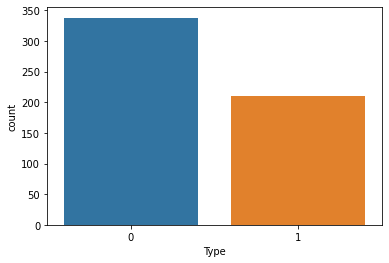

In [6]:
sbn.countplot(x="Type",data=df)

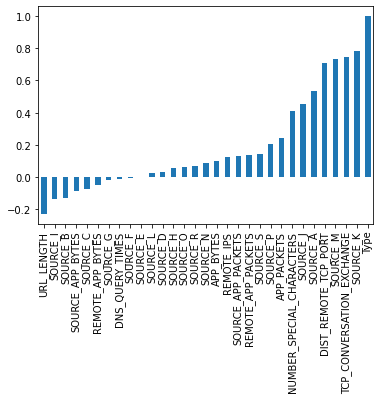

In [7]:
df.corr()["Type"].sort_values().plot(kind="bar")

In [8]:
y=df["Type"].values
x=df.drop("Type",axis=1).values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

In [13]:
scaler.fit(x_train)

MinMaxScaler()

In [14]:
x_train=scaler.transform(x_train)

In [15]:
x_test=scaler.transform(x_test)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
x_train.shape

(383, 30)

In [18]:
model=Sequential()
model.add(Dense(units=30,activation="relu")) #30nöron
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu")) 
model.add(Dense(units=1,activation="sigmoid"))  

In [19]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [20]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 20ms/step - loss: 0.6854 - val_loss: 0.6919
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6755 - val_loss: 0.6873
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6635 - val_loss: 0.6797
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6504 - val_loss: 0.6718
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6339 - val_loss: 0.6580
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6098 - val_loss: 0.6382
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5800 - val_loss: 0.6121
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5399 - val_loss: 0.5699
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4941 - val_loss: 0.5262
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4357 - val_loss: 0.4865
Epoch 11

In [21]:
model.history.history

{'loss': [0.6854027509689331,
  0.675495445728302,
  0.6635445952415466,
  0.6504104733467102,
  0.6338929533958435,
  0.6098085641860962,
  0.5799986720085144,
  0.5399174094200134,
  0.4940904974937439,
  0.43567270040512085,
  0.3791695833206177,
  0.33527109026908875,
  0.2940363585948944,
  0.26209136843681335,
  0.23517465591430664,
  0.2160838097333908,
  0.20471887290477753,
  0.18635427951812744,
  0.1817864179611206,
  0.17430144548416138,
  0.16423483192920685,
  0.1537451446056366,
  0.14896360039710999,
  0.14408183097839355,
  0.13671474158763885,
  0.13756988942623138,
  0.1298338919878006,
  0.12474875897169113,
  0.1196868047118187,
  0.11737988144159317,
  0.11423768103122711,
  0.11167366802692413,
  0.10691080242395401,
  0.10717203468084335,
  0.10773725807666779,
  0.10442148149013519,
  0.09974851459264755,
  0.0972081869840622,
  0.09582764655351639,
  0.09382309764623642,
  0.09204628318548203,
  0.08996624499559402,
  0.08930200338363647,
  0.08874392509460449

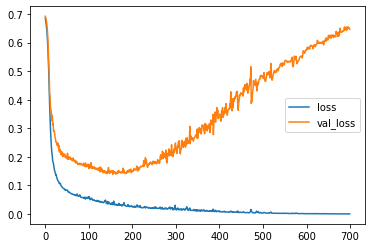

In [24]:
modelKaybi=pd.DataFrame(model.history.history)
modelKaybi.plot()

In [25]:
model=Sequential()
model.add(Dense(units=30,activation="relu")) #30nöron
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu")) 
model.add(Dense(units=1,activation="sigmoid")) 
model.compile(loss="binary_crossentropy",optimizer="adam")

In [28]:
earlyStopping=EarlyStopping(monitor="val_loss",mode="min" ,verbose=1,patience=25)

In [29]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 18ms/step - loss: 0.6906 - val_loss: 0.6837
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6781 - val_loss: 0.6746
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6623 - val_loss: 0.6598
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6393 - val_loss: 0.6373
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6068 - val_loss: 0.6072
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5624 - val_loss: 0.5718
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5049 - val_loss: 0.5205
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4473 - val_loss: 0.4671
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3927 - val_loss: 0.4445
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3469 - val_loss: 0.4006
Epoch 11

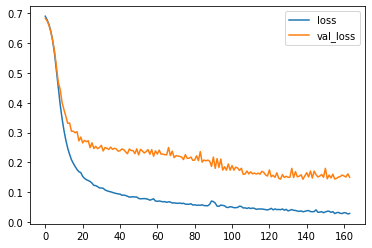

In [32]:
modelKaybi=pd.DataFrame(model.history.history)
modelKaybi.plot()

In [39]:
model=Sequential()
model.add(Dense(units=30,activation="relu"))#30nöron
model.add(Dropout(0.5))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.5)) 
model.add(Dense(units=1,activation="sigmoid")) 
model.compile(loss="binary_crossentropy",optimizer="adam")

In [40]:
model.fit(x=x_train,y=y_train,epochs=160,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/160
12/12 [==============================] - 1s 18ms/step - loss: 0.6894 - val_loss: 0.6893
Epoch 2/160
12/12 [==============================] - 0s 5ms/step - loss: 0.7049 - val_loss: 0.6862
Epoch 3/160
12/12 [==============================] - 0s 6ms/step - loss: 0.6979 - val_loss: 0.6824
Epoch 4/160
12/12 [==============================] - 0s 6ms/step - loss: 0.6839 - val_loss: 0.6783
Epoch 5/160
12/12 [==============================] - 0s 4ms/step - loss: 0.6839 - val_loss: 0.6744
Epoch 6/160
12/12 [==============================] - 0s 5ms/step - loss: 0.6732 - val_loss: 0.6703
Epoch 7/160
12/12 [==============================] - 0s 6ms/step - loss: 0.6475 - val_loss: 0.6650
Epoch 8/160
12/12 [==============================] - 0s 6ms/step - loss: 0.6537 - val_loss: 0.6574
Epoch 9/160
12/12 [==============================] - 0s 6ms/step - loss: 0.6637 - val_loss: 0.6512
Epoch 10/160
12/12 [==============================] - 0s 5ms/step - loss: 0.6442 - val_loss: 0.6446
Epoch 11

In [41]:
kayipdf=pd.DataFrame(model.history.history)

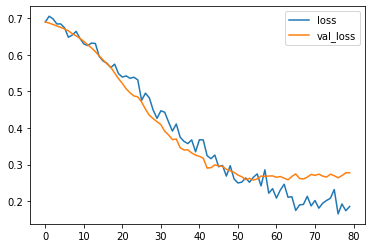

In [42]:
kayipdf.plot()

In [46]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

In [49]:
classes_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(confusion_matrix(y_test,classes_x))

[[91  0]
 [74  0]]
